<a href="https://colab.research.google.com/github/hughjafro/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/CTolbert_DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [55]:
# Set new column names
col_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
#import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None)
# change names of columns
df.columns = col_names

# replace ? with NaN, - to 0 and + to 1
df = df.replace({'?': np.nan, '-': 0, '+': 1})

print(df.shape) # Should be 690 rows and 16 columns
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [56]:
# Check NaN
print('Number of total NAN: ', df.isna().sum().sum())
df.isna().sum()

Number of total NAN:  67


A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
# Change columns to proper data types
df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']] = df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']].apply(pd.to_numeric)

In [58]:
df.describe()

,A2,A3,A8,A11,A14,A15,A16
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507,0.444928
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000,0.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000,1.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null int64
A16    690 non-null int64
dtypes: float64(4), int64(3), object(9)
memory usage: 86.3+ KB


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

***Explore the data***: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the **6 continuous features**, how are they different when split between the two class labels? **Choose two features to run t-tests** (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the ***categorical features***, explore by ***creating "cross tabs"*** between them and the class label, and apply the ***Chi-squared test *** to them. There are 9 categorical features - as with the t-test, try to ***find one where the Chi-squared test returns an extreme result*** (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the ***hypothesis tests***, so don't spend too much time on the exploration/visualization piece. That is just a means to an end. This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [8]:
# check prob of acceptance - Only a 44% approval rate
df.A16.sum() / len(df.A16)

0.4449275362318841

In [11]:
# Look at value counts of each unique value in A16 to match data description
df.A16.value_counts()

0    383
1    307
Name: A16, dtype: int64

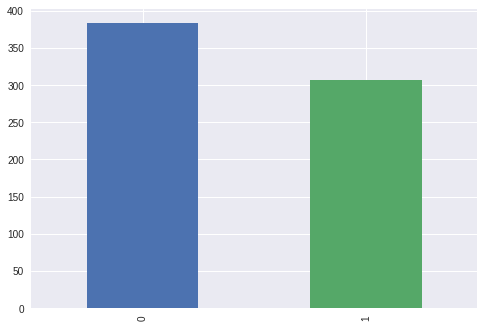

In [13]:
df.A16.value_counts().plot.bar();

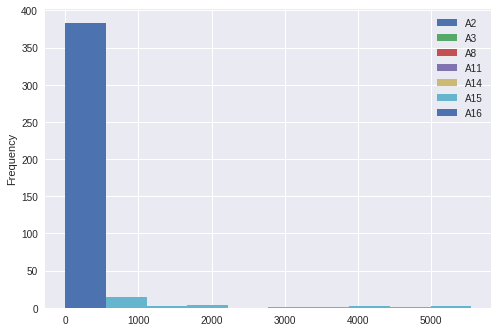

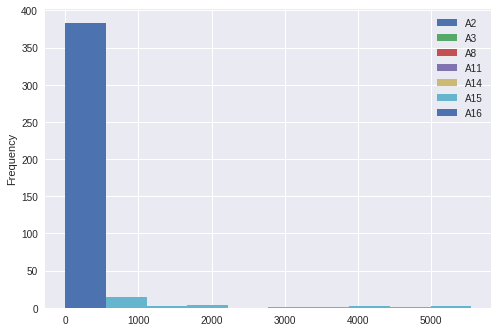

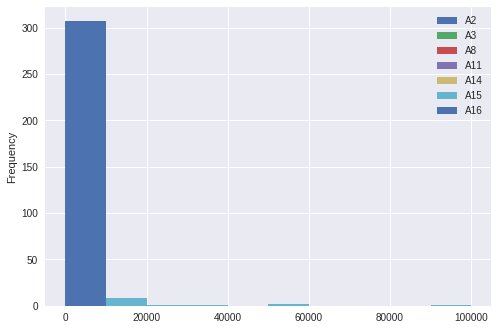

In [62]:
# Group by the accept/reject column 16 and plot
accept = df.groupby(df.A16)
accept.plot.hist();

In [65]:
# Equal chance to be accepted or rejected
stats.ttest_1samp(df.A16, 0.5)

Ttest_1sampResult(statistic=-2.9088721445109043, pvalue=0.0037441556293534564)

In [71]:
# quick look at all means for numbers
print(df.A2.mean()) # age
print(df.A3.mean()) # debt
print(df.A8.mean()) # Yrs employed
print(df.A11.mean()) # credit score
print(df.A14.mean()) # zip code
print(df.A15.mean()) # income

31.56817109144543
4.758724637681159
2.223405797101449
2.4
184.01477104874445
1017.3855072463768


In [73]:
# Accept and debt
stats.ttest_ind(df.A16, df.A3) 

Ttest_indResult(statistic=-22.649506214896903, pvalue=8.258650744072708e-97)

In [81]:
# Accept and credit score
stats.ttest_ind(df.A16, df.A11)


Ttest_indResult(statistic=-10.50580271265132, pvalue=6.883898239954908e-25)

In [77]:
# Accept and zipcode
stats.ttest_ind(df.A16, df.A14) 

Ttest_indResult(statistic=nan, pvalue=nan)


In [78]:
# Accept and age
stats.ttest_ind(df.A16, df.A2) 

Ttest_indResult(statistic=nan, pvalue=nan)

In [0]:
# Crosstab A16 and A3, approval vs debt
approval_debt = pd.crosstab(df.A3, df.A16)

In [101]:
# USe Chi Square to analyze
stats.chisquare(approval_debt)

Power_divergenceResult(statistic=array([781.81723238, 447.25081433]), pvalue=array([1.16960216e-65, 1.40112199e-18]))

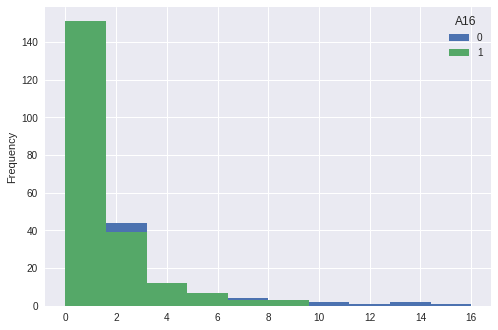

In [103]:
approval_debt.plot.hist()

In [99]:
# I think A7 is ethnicity, compare A7 and A16
approval_eth = pd.crosstab(df.A7, df.A16)
stats.chisquare(approval_eth)

Power_divergenceResult(statistic=array([1029.33333333,  792.23762376]), pvalue=array([6.95132317e-217, 9.69179520e-166]))

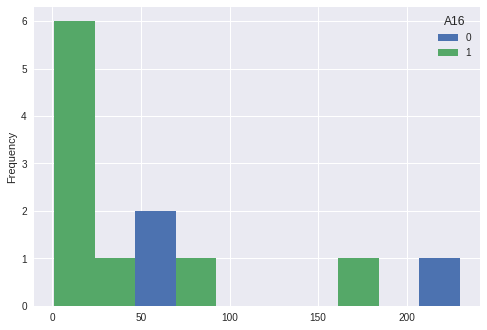

In [104]:
approval_eth.plot.hist()

In [0]:
#df_age = pd.crosstab(df.A16, df.A2)

In [0]:
#df_debt = pd.crosstab(df.A16, df.A3)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*